In [1]:
import pandas as pd

In [2]:
df = pd.read_json('../../data/1000_annotated.json')
print(df.shape)
print(df.columns)
df.head()

(1000, 45)
Index(['conversation_id', 'lang', 'reply_settings', 'created_at', 'clean_text',
       'text', 'author_id', 'referenced_tweets', 'id',
       'edit_history_tweet_ids', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'public_metrics.impression_count', 'in_reply_to_user_id',
       'geo.place_id', 'withheld.copyright', 'withheld.country_codes',
       'geo.coordinates.type', 'geo.coordinates.coordinates',
       'textblob_Polarity', 'textblob_Subjectivity', 'vader_Polarity',
       'vader_Subjectivity', 'AFINN_scores', 'AFINN_sentiments',
       'SentiWordNet_scores', 'normalized_textblob_Polarity',
       'normalized_textblob_Subjectivity', 'normalized_vader_Polarity',
       'normalized_vader_Subjectivity', 'normalized_AFINN_scores',
       'normalized_SentiWordNet_scores', 'our_label', 'annotator',
       'roberta_content', 'roberta_polarity', 'roberta_sentiment', 'keyword',
       'normalized_roberta_polarity', 'text

,conversation_id,lang,reply_settings,created_at,clean_text,text,author_id,referenced_tweets,id,edit_history_tweet_ids,...,roberta_content,roberta_polarity,roberta_sentiment,keyword,normalized_roberta_polarity,textblob_label,vader_label,AFINN_label,SentiWordNet_label,roberta_label
96,1633842088692576256,en,everyone,2023-03-09 14:48:00,rt sakuraayumim imam mahdi fake or a liar all...,RT @SakuraayumiM: Imam Mahdi? Fake or a liar.....,1627320000000000000,"[{'type': 'retweeted', 'id': '1632676802404696...",1633840000000000000,['1633842088692576258'],...,RT @user Imam Mahdi? Fake or a liar... Allah k...,-0.309507,negative,#chrisrocklive,0.289530,positive,negative,neutral,neutral,negative
185,1633724515212742656,en,everyone,2023-03-09 07:00:52,rt netflix #chrisrocklive tonight at 10pm et ...,RT @netflix: #ChrisRockLive TONIGHT at 10pm ET...,2348520354,"[{'type': 'retweeted', 'id': '1631421624359739...",1633724515212742656,['1633724515212742656'],...,RT @user #ChrisRockLive TONIGHT at 10pm ET/ 7p...,0.537050,positive,#chrisrocklive,0.853285,neutral,positive,neutral,neutral,positive
211,1633695793629523968,en,everyone,2023-03-09 05:06:00,rt sagesurge marlon wayans roasting chris roc...,RT @sagesurge: Marlon Wayans roasting Chris Ro...,2397467817,"[{'type': 'retweeted', 'id': '1632525319973289...",1633700000000000000,['1633695793629523971'],...,RT @user Marlon Wayans roasting Chris Rock abo...,-0.327477,negative,#chrisrocklive,0.277563,neutral,neutral,neutral,neutral,negative
217,1633694879942418432,en,everyone,2023-03-09 05:03:06,rt sagesurge marlon wayans roasting chris roc...,RT @sagesurge: Marlon Wayans roasting Chris Ro...,919387431140388864,"[{'type': 'retweeted', 'id': '1632525319973289...",1633694879942418432,['1633694879942418432'],...,RT @user Marlon Wayans roasting Chris Rock abo...,-0.327477,negative,#chrisrocklive,0.277563,neutral,neutral,neutral,neutral,negative
218,1633694024090386432,en,everyone,2023-03-09 04:59:00,rt sagesurge marlon wayans roasting chris roc...,RT @sagesurge: Marlon Wayans roasting Chris Ro...,341898069,"[{'type': 'retweeted', 'id': '1632525319973289...",1633690000000000000,['1633694024090386433'],...,RT @user Marlon Wayans roasting Chris Rock abo...,-0.327477,negative,#chrisrocklive,0.277563,neutral,neutral,neutral,neutral,negative


In [3]:
df.annotator.value_counts()

annotator
melissa    400
sarik      300
anu        300
Name: count, dtype: int64

In [5]:
big_df = pd.read_json('../../data/big_data_all_annotations.20230501.2113.json')
print(big_df.shape)
print(big_df.columns)

label_cols = [c for c in big_df.columns if 'label' in c]
label_cols.append('text')
label_cols.append('conversation_id')
big_df[label_cols].loc[~big_df['our_label'].isna()].head()

(30611, 45)
Index(['conversation_id', 'lang', 'reply_settings', 'created_at', 'clean_text',
       'text', 'author_id', 'referenced_tweets', 'id',
       'edit_history_tweet_ids', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'public_metrics.impression_count', 'in_reply_to_user_id',
       'geo.place_id', 'withheld.copyright', 'withheld.country_codes',
       'geo.coordinates.type', 'geo.coordinates.coordinates',
       'textblob_Polarity', 'textblob_Subjectivity', 'vader_Polarity',
       'vader_Subjectivity', 'AFINN_scores', 'AFINN_sentiments',
       'SentiWordNet_scores', 'normalized_textblob_Polarity',
       'normalized_textblob_Subjectivity', 'normalized_vader_Polarity',
       'normalized_vader_Subjectivity', 'normalized_AFINN_scores',
       'normalized_SentiWordNet_scores', 'our_label', 'annotator',
       'roberta_content', 'roberta_polarity', 'roberta_sentiment', 'keyword',
       'normalized_roberta_polarity', 'tex

,our_label,textblob_label,vader_label,AFINN_label,SentiWordNet_label,roberta_label,text,conversation_id
96,negative,positive,negative,neutral,neutral,negative,RT @SakuraayumiM: Imam Mahdi? Fake or a liar.....,1633842088692576256
185,neutral,neutral,positive,neutral,neutral,positive,RT @netflix: #ChrisRockLive TONIGHT at 10pm ET...,1633724515212742656
211,neutral,neutral,neutral,neutral,neutral,negative,RT @sagesurge: Marlon Wayans roasting Chris Ro...,1633695793629523968
217,neutral,neutral,neutral,neutral,neutral,negative,RT @sagesurge: Marlon Wayans roasting Chris Ro...,1633694879942418432
218,neutral,neutral,neutral,neutral,neutral,negative,RT @sagesurge: Marlon Wayans roasting Chris Ro...,1633694024090386432


In [10]:
from sklearn.metrics import cohen_kappa_score as cohen
from itertools import combinations

annot_cols = ['textblob_label', 'vader_label', 'AFINN_label', 
              'SentiWordNet_label', 'roberta_label', 'our_label']

print('All combinations (including annotations and the vote):\n', [x for x in combinations(annot_cols, 2)], '\n')

annotated_df = big_df.loc[~big_df['our_label'].isna()]
for pair in [x for x in combinations(annot_cols, 2)]:
    print(pair, cohen(annotated_df[pair[0]], annotated_df[pair[1]]))



All combinations (including annotations and the vote):
 [('textblob_label', 'vader_label'), ('textblob_label', 'AFINN_label'), ('textblob_label', 'SentiWordNet_label'), ('textblob_label', 'roberta_label'), ('textblob_label', 'our_label'), ('vader_label', 'AFINN_label'), ('vader_label', 'SentiWordNet_label'), ('vader_label', 'roberta_label'), ('vader_label', 'our_label'), ('AFINN_label', 'SentiWordNet_label'), ('AFINN_label', 'roberta_label'), ('AFINN_label', 'our_label'), ('SentiWordNet_label', 'roberta_label'), ('SentiWordNet_label', 'our_label'), ('roberta_label', 'our_label')] 

('textblob_label', 'vader_label') 0.197940474268673
('textblob_label', 'AFINN_label') 0.12127725730353789
('textblob_label', 'SentiWordNet_label') 0.08905238238911972
('textblob_label', 'roberta_label') 0.12381150669720309
('textblob_label', 'our_label') 0.12682559238304847
('vader_label', 'AFINN_label') 0.1517840330965622
('vader_label', 'SentiWordNet_label') 0.16668417330168128
('vader_label', 'roberta_lab

# Rerun ensemble eval

From notebook "Work w Roberta Data"

ensemble ('normalized_textblob_Polarity',): 0.489
ensemble ('normalized_vader_Polarity',): 0.535
ensemble ('normalized_roberta_polarity',): 0.662
ensemble ('normalized_textblob_Polarity', 'normalized_roberta_polarity'): 0.686
ensemble ('normalized_AFINN_scores', 'normalized_roberta_polarity'): 0.719
Best Accuracy found from averaging ('normalized_AFINN_scores', 'normalized_roberta_polarity'): 0.719
              precision    recall  f1-score   support

    negative       0.74      0.68      0.71       365
     neutral       0.71      0.77      0.74       484
    positive       0.70      0.63      0.66       151

    accuracy                           0.72      1000
   macro avg       0.72      0.70      0.70      1000
weighted avg       0.72      0.72      0.72      1000

[[179 180   6]
 [ 78 382  24]
 [ 16  64  71]]


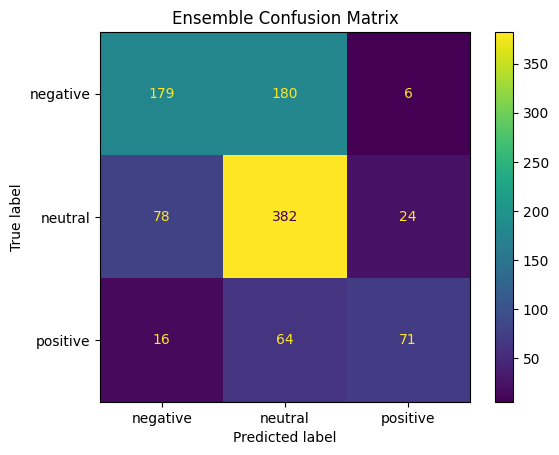

In [16]:
import seaborn
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')


label_cols = ['our_label', 'textblob_label', 'vader_label',
              'AFINN_label', 'SentiWordNet_label', 'roberta_label']
score_cols = ['normalized_textblob_Polarity', 'normalized_vader_Polarity', 
              'normalized_AFINN_scores', 'normalized_SentiWordNet_scores',
              'normalized_roberta_polarity'
             ]

#score_df = annot_df[score_cols]
annot_df = annotated_df
test_df = annot_df[score_cols + label_cols]

min_neutral = .5 - .5/4
max_neutral = .5 + .5/4

assert test_df.shape[0] == 1000, 'wrong shape'

def score_to_label(score_cols):
    # untested; should return array with labels
    #print('type of score cols:', type(score_cols))
    test_df['averages'] = score_cols.mean(axis=1)
    #print(type(test_df['averages']), test_df['averages'].shape)
    result = np.where(test_df['averages'] >= max_neutral, 'positive',
                          np.where(test_df['averages'] <= min_neutral, 'negative', 'neutral')
                         )
    
    #print('Result info', type(result), result.shape)
    return result

def ensemble_search(columns, truth, r=4):
    best_ensemble = None
    best_accuracy = 0
    best_report = None

    for r2 in range(1,r+1):
        for c in combinations(columns, r2):
            #print(c)
            #print(list(c))
            #print(test_df[list(c)].shape)
            test_df['ensemble_label'] = score_to_label(test_df[list(c)])
            report = classification_report(test_df['our_label'], test_df['ensemble_label'], output_dict=True)
            if report['accuracy'] > best_accuracy:
                best_accuracy = report['accuracy']
                best_ensemble = c
                print(f'ensemble {c}: {best_accuracy}')
                best_report = classification_report(test_df['our_label'], test_df['ensemble_label'])
                
    print(f'Best Accuracy found from averaging {best_ensemble}: {best_accuracy}')
    print(best_report)
    
    # confusion matrix:
    #cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
    cm = confusion_matrix(y_true=test_df['our_label'], y_pred=test_df['ensemble_label'])
    print(cm)
    
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=my_encoder.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'neutral', 'positive'])
    disp.plot()
    disp.ax_.set_title('Ensemble Confusion Matrix')

    plt.show()
        

test_columns = score_cols

ensemble_search(test_columns, 'our_label')
#score_to_label(['normalized_textblob_Polarity'])
